In [3]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Generate random data
np.random.seed(42)
torch.manual_seed(42)
X = np.random.rand(100, 2)
y = np.random.randint(0, 3, (100, 1))  # 3 classes

In [5]:
# Convert data to tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).long()

In [6]:
# Define the softmax regression model
class SoftmaxRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

In [7]:
# Instantiate the model
model = SoftmaxRegression(2, 3)  # 2 features, 3 classes

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [8]:
# Train the model
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y.squeeze())

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    losses.append(loss.item())

Epoch [10/100], Loss: 1.1203
Epoch [20/100], Loss: 1.1180
Epoch [30/100], Loss: 1.1159
Epoch [40/100], Loss: 1.1140
Epoch [50/100], Loss: 1.1122
Epoch [60/100], Loss: 1.1106
Epoch [70/100], Loss: 1.1091
Epoch [80/100], Loss: 1.1077
Epoch [90/100], Loss: 1.1065
Epoch [100/100], Loss: 1.1053


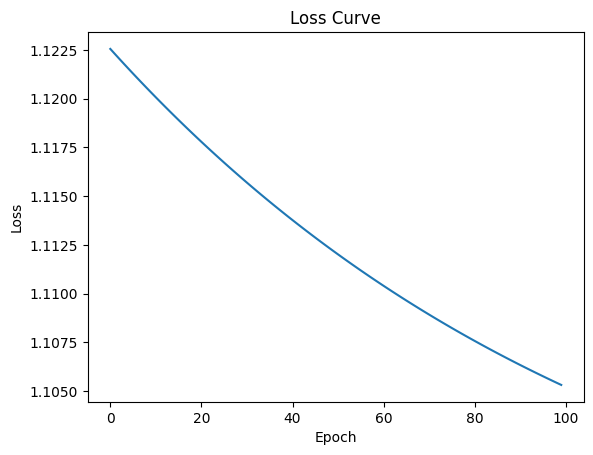

In [9]:
# Plot the loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

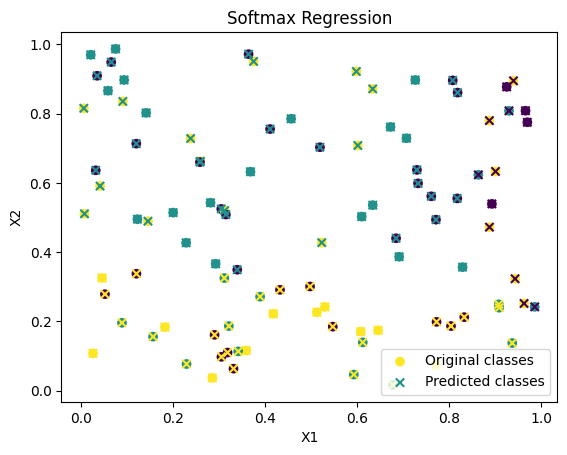

In [10]:
# Get the predicted classes
_, predicted_classes = torch.max(model(X), dim=1)

# Plot the original data and the predicted classes
plt.scatter(X[:, 0].numpy(), X[:, 1].numpy(), c=y.numpy().flatten(), label='Original classes')
plt.scatter(X[:, 0].numpy(), X[:, 1].numpy(), c=predicted_classes.numpy().flatten(), label='Predicted classes', marker='x')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Softmax Regression')
plt.legend()
plt.show()